¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Sprint 6 Proyecto Integrador

El propósito de este proyecto es encontrar un patrón para identificar que juegos son exitosos considerando todo el contexto que viene siendo la plataforma, país, género 

Librerías y herramientas externas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
games = pd.read_csv('/datasets/games.csv' )



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien usaste una celda independiente para importar las librerías y otra para leer los datos.
</div>

### Limpieza de Datos 

En esta sección preparo los datos para poder ser usados

#### Preparar los nombres de las columnas.

Utilizamos el formato tidy_snake para una mayor facilidad a la hora de acceder a los diferentes datos.

Vemos la información general de el dataset para los siguientes pasos.

In [3]:
games.columns = games.columns.str.lower().str.strip()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Conversión de datos en tipos necesarios

Explicación rápida del tipo de datos necesario para cada columna:

Si no nombro la columna es porque su tipo de dato ya era el adecuado.

**'platform'    object--- category**

Así reducimos el tamaño del dataframe y hacemos que diferentes operaciones sean mucho más rápidas.


**'year_of_release'  float 64--- datetime**

facilitará organizar los datos en base a fecha de ser necesario.


**'genre'      object--- category**    

Esto para que realizar las operaciones sea más rápido, además de que ahorra algo de memoria en el sistema.


**'user_score'    object--- float 64**

para poder realizar operaciones y análisis estadísticos ya que el user_score es un buen indicador del éxito de una franquicia.

**'rating'     object --- category**

Por las mismas razones que antes convertimos género y plataforma.

In [4]:
# Convert 'platform' to category
games['platform'] = games['platform'].astype('category')

# Convert 'year_of_release' to datetime
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y', errors='coerce')

# Convert 'genre' to category
games['genre'] = games['genre'].astype('category')

# Convert 'user_score' to float
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# COnvert 'rating' to category
games['rating'] = games['rating'].astype('category')

# Verificar los cambios realizados
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  category      
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  category      
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   category      
dtypes: category(3), datetime64[ns](1), float64(6), object(1)
memory usage: 1.1+ MB
None


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar y corregir los datos.
</div>

#### Datos ausentes

A continucación explico como se trataran los valores ausentes en el resto de columnas.

**'name'** esta columna es demasiado importantes como para omitirla en caso de no haber datos, por lo que 

valores Nan en 'names' serán eliminados de la lista

**'year_of_release','genre'** son datos importantes, aunque no son lo que define la popularidad del juego completamente, year of release puede dar información valiosa respecto al contexto temporal (10,000  ventas para un juego de hace 4 años no es lo mismo que para uno de este año que no ha estado mas que días en circulación) y genre nos puede dar una idea de que tan exitoso es el juego en comparación a otros juegos similares (ya que por ejemplo strategy no es una categoría tan popular como racing podríamos cometer el error de pensar que un juego de strategy que obtuvo ventas menores que el promedio de racing es inexitoso cuando de hecho supera el promedio de strategy) ninguno de estos dos datos por su cuenta define que tan exitoso fue el juego, solo nos dan 'insights' que nos muestran más contexto de la popularidad de cualquier juego pero sin estos insights no podemos definir si el juego es realmente exitoso con tanta facilidad.

valores Nan en year_of_release y genre serán eliminados puesto que son pocos los que faltan y su presencia dificulta darle contexto a la popularidad y éxito del juego.

**'sales'** Todas las columnas sales son importantes para definir la popularidad del juego, cuando no hay suficiente información de sales no podemos saber cuanta gente compro el juego y eso es el principal indicador de éxito complementado solo por las críticas., podemos autocompletar columnas de sales en base a el promedio de los juegos con la misma fecha de lanzamiento y que vienen del mismo año pero esto tiene sus contras, en este dataframe afortunadamente no parece ser necesario puesto que no faltan valores de ventas para ningún juego.

**'score'**
El score te dice bastante sobre que tan bien recibido fue el juego por los jugadores y la crítica, poco más de la mitad de los scores no han sido registrados por lo que no podemos eliminar los datos sin score, originalmente creí que los juegos sin score fueron tan malos que simplemente no habían reseñas pero tras ver juegos con varios millones de dólares en ventas sin score supongo que la data simplemente se perdió o no fue registrada, puedo intentar rellenar los valores ausentes con el promedio de cada categoría para que no se pierda tanto contexto pero, debido a la gran cantidad de datos faltantes esto no es muy recomendable, juegos con scores terribles pero no registrados parecerían mejor aceptados, juegos con muy buenos scores pero sin data podrían parecer menos importantes de lo que son realmente.

Posibles soluciones:

~~Regresión linear~~
Existe algo que se llama análisis de regresión donde se busca encontrar la relación de la variable dependiente con todas las variables independientes con lo cual se podría predecir en base a las variables independientes cuál será el valor de la variable dependiente, en este caso aplicar una regla donde en base a las ventas globales, rating y otros factores el modelo prediga que score de crítica puede tener cada videojuego, si bien la cantidad de ventas puede ser directamente proporcional con el score de las críticas no podemos hacer de las ventas el principal determinador de la crítica puesto que esta esta más rozando el area de subjetividad, hay casos de videojuegos que tenían mucha expectativa y tuvieron gran cantidad de ventas en los primeros meses pero que no estuvieron a la par de lo que se esperaba resultando en grandes ventas pero terribles críticas, hay videojuegos indie que tienen muy pocas ventas y muy poca exposición pero críticas muy buenas de los pocos jugadores que lo jugaron...  En conclusión el análisis de regresión podría aproximar algunos casos de críticas, pero no es un método muy confiable para una situación donde no hay una correlación tan fuerte o clara.

~~Web Scraping y acceso a APIs de sitios de reseñas~~
La otra solución podría ser crear un código que detecte cuando un juego no tenga score y busqué online el nombre del juego e investigue varias fuentes para determinar las reseñas de los usuarios y críticos pero eso ya se acerca mucho a web scraping o acceso a APIs (saber hacer código que navegue por internet) cosa que aún no aprendo, si bien en una situación de la vida real posiblemente tendría que encontrar a un experto en eso para que escriba esa línea de código que solucione mi problema y me permita seguir con lo otro o yo mismo aprender a solucionar ese problema,  supongo que eso queda fuera del scope de este curso por lo que en esta ocación no implementaré este enfoque.

Solución final: 
Dado a lo difícil que es predecir adecuadamente cual sería el score real de cada juego que no lo tiene y a que el enfoque de este Sprint no es acceder APIs o web scrapping usaré el primer método (promedios en base a la categoría) pero haré que los scores tengan que ser complementados por las ventas para definir la popularidad.


**'rating'**
El rating cumple una función similar a las columnas de genre y year of release pero este no tiene tanta importancia como estas, si acaso puede que haya una diferencia en popularidad entre las categorías de A y E por ejemplo puesto que más niños tienen acceso a juegos E un juego categoría A que tenga más ventas que un juego categoría E puede verse como un juego más exitoso o popular, pero aún mantengo que la fecha de lanzamiento y el género del juego son puntos más importantes por lo que las filas con valores Nan de rating pueden ser dejadas en el data frame sin problema.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buenos comentarios, bastante completos.
</div>

#### Ventas Totales

Sumando todas las columas de ventas crearé una nueva columna en donde se agregue el valor de las ventas totales para cada videojuego.

In [6]:

total_sales = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games.insert(8,'total_sales',total_sales)

games


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


### Análisis de datos

#### Juegos lanzados por año
Creo una gráfica lineal para mostrar cuantos juegos han sido creados a lo largo de los últimos años y poder apreciar su avance.

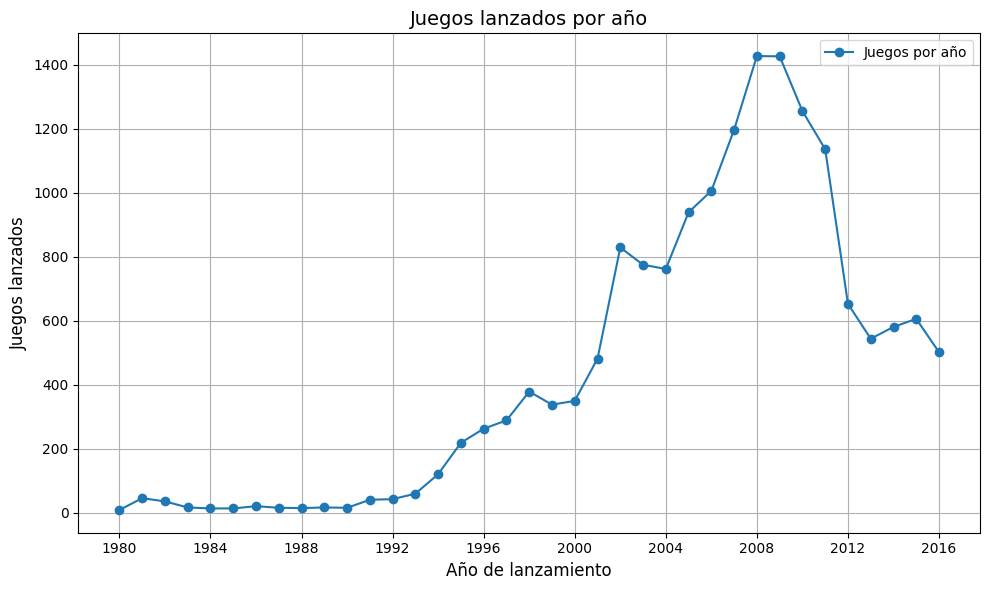

In [7]:
games_year = games.pivot_table(
    index='year_of_release',
    values=['name','total_sales'],
    aggfunc={'name':'count','total_sales':'sum'}
    
)

games_year.rename(columns={'name':'games'},inplace=True)

# graficar la data
plt.figure(figsize=(10, 6))
plt.plot(games_year.index, games_year['games'], marker='o', label='Juegos por año')

# Customizar los títulos de la tabla
plt.xlabel('Año de lanzamiento', fontsize=12)
plt.ylabel('Juegos lanzados', fontsize=12)
plt.title('Juegos lanzados por año', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()


plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, la gráfica se ve bien y tiene toda la información necesaria para su análisis, como título y nombre en los ejes.
</div>

Podemos ver que la cantidad de juegos lanzados por año fue aumentando desde los 90's luego de recuperarse de un estancamiento en la decada de los 80's, aunque a partir del 2009 se ha reducido la cantidad de nuevos juegos.

Más adelante veremos que las plataformas de moda ya no se están vendiendo en años recientes (2010 en adelante) con tanta fuerza como lo hicieron durante la primer década del milenio, esto y la reducción en el número de nuevos juegos publicados podría indicar que la industria se está estancando lo cual habría que considerar a la hora de medir el éxito de los juegos.

#### Distribución de ventas por plataformas principales

Eligiré el top 7 de las mejores plataformas de videojuegos según sus ventas totales, esto para poder cubrir un mayor número de casos y ver como la moda va cambiando conforme pasan los años.

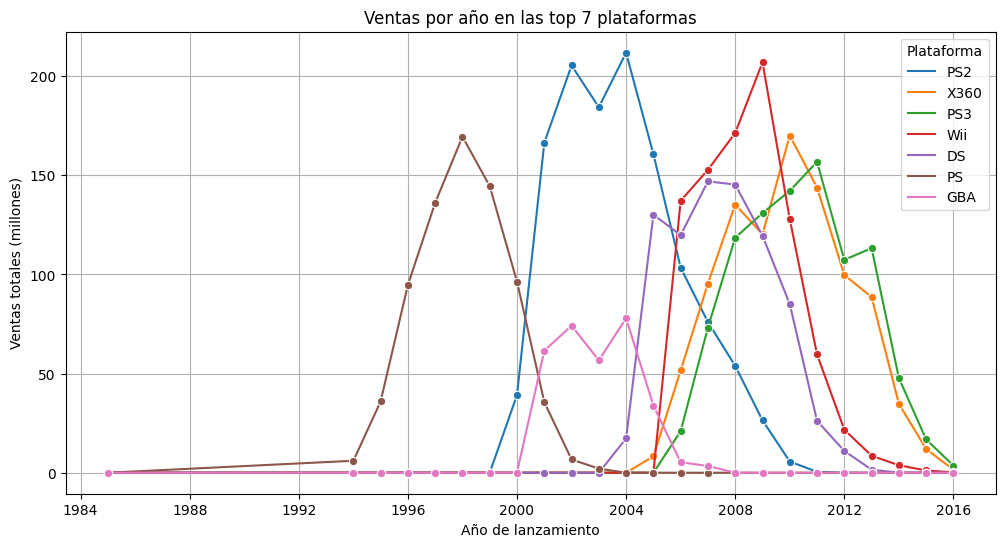

In [8]:
# Este código me dará las n plataformas con mayores ventas, solo debo modificar el parámetro en nlargest()


top_platforms = games.groupby('platform')['total_sales'].sum().nlargest(7).index


games_top_platforms = games[games['platform'].isin(top_platforms)]


yearly_sales = games_top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Crear el plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='year_of_release', y='total_sales', hue='platform', marker='o', hue_order=top_platforms)

# Añadir títulos a la gráfica
plt.title('Ventas por año en las top 7 plataformas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Plataforma')
plt.grid(True)


plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, las gráficas se muestran correctamente para su comparación.
</div>

Podemos apreciar que todas las plataformas más populares siguen un ciclo de ventas ascendentes y un pico que en total suele durar unos 4 años para después perder mercado y popularidad durante los siguientes 4 años (en la mayoría de los casos) haciendo que el tiempo de vida promedio de cada plataforma sea de unos 8 años aunque hay unas excepciones. Esto claro si son populares... es muy probable que plataformas menos populares tengan ciclos de vida más cortos por la falta de exposición.

Antes había solo una consola superior que dominaba el mercado pero durante la década de los 2000 aparentemente hubieron simultaneamente 4 líderes de la industria.

Nota: las plataformas más populares para a partir de 2012 no están en el top puesto que no habían cumplido el ciclo completo de 8 años a la hora de graficar la tabla lo que les deja menos ventas totales.

#### Periodo elegido para representar la predicción de popularidad en el año 2017

Viendo que las plataformas de mediados de la década de los 2000 están llegando a su ocaso me parece que la mejor predicción podría venir de ver las plataformas de inicios de 2010 y ver que tendencia tienen para poder predecir como se podría ver el 2017

las dos únicas plataformas que son más recientes en esta base de datos son xbox one y play station 4, así como nintendo 3ds, estas 3 deberían desempeñarse mejor durante la nueva década, en especial xbox one y playstation que salieron en 2013 puesto que esto pone 7 de sus posibles 8 años de vida útil dentro de la década con lo cual deberían tomar el rol de los xbox 360 y play station 3 de la década pasada.

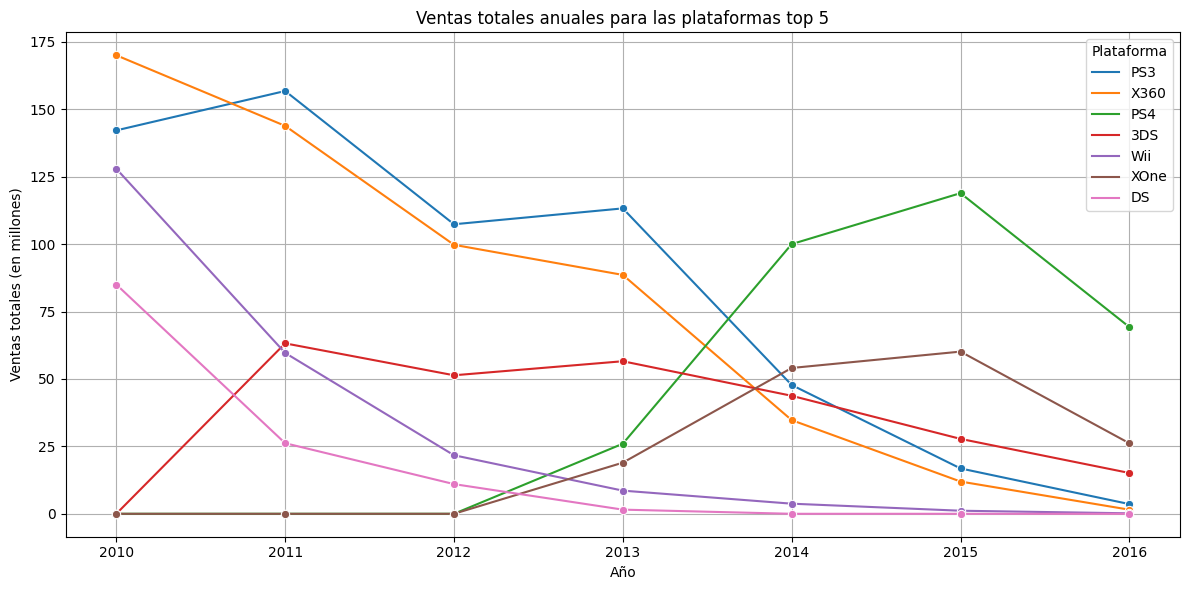

In [9]:

#Filtramos la data para mostrar únicamente los datos de 2010 en adelante y las mejores plataformas en desempeño de ventas
filtered_data = games[games['year_of_release'].dt.year >= 2010]
top_platforms = filtered_data.groupby('platform')['total_sales'].sum().nlargest(7).index
filtered_top_platforms = filtered_data[filtered_data['platform'].isin(top_platforms)]
filtered_top_platforms

# agrupamos la data según el año en el que cada juego se lanzó 
yearly_sales = filtered_top_platforms.groupby(
    [filtered_top_platforms['year_of_release'].dt.year, 'platform']
)['total_sales'].sum().reset_index()


yearly_sales.rename(columns={'year_of_release': 'Year', 'platform': 'Platform', 'total_sales': 'Total Sales'}, inplace=True)

#Creamos da plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='Year', y='Total Sales', hue='Platform', marker='o',hue_order=top_platforms)
plt.title('Ventas totales anuales para las plataformas top 5')
plt.xlabel('Año')
plt.ylabel('Ventas totales (en millones)')
plt.grid(True)
plt.legend(title='Plataforma', loc='upper right')
plt.tight_layout()
plt.show()



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho. Al reducir la ventana a 2010 se muestra la información más reciente.
</div>

En la gráfica a partir de la década del 2010 se puede ver que las grandes plataformas de la década anterior están todas en decadencia pero aún lideran los primeros 4 años las ventas en juegos de la década de los 2010, sin embargo a partir del 2014 las nuevas plataformas logran superar en ventas a las antiguas y parece que en 2015 van en curso de seguir el ciclo de 4 años de crecimiento en ventas segudios de otros 4 de declive pero sorprendentemente al 4to año en lugar de aumentar las ventas estas disminuyen para todas las  plataformas por igual, las plataformas que estaban en auge no logran mantener la inercia y reducen sus ventas.

Rentabilidad: 

Siendo que las plataformas más nuevas suelen mantenerse en auge o con ventas estables más tiempo es muy posible que tanto play station 4 como xbox one sean una mejor opción a la hora de invertir en nuevos juegos puesto que es más probable que mantengan ventas más altas los siguientes 4 años hasta ser reemplazadas por nuevas generaciones, a menos que surja un competidor inesperado en el año 2017 que les quite ventas. El hecho de que todas las plataformas hayan pedido ventas durante 2016 podría indicar un fenómeno macroeconómico fuera de la industria de los videojuegos que afectó las ventas en el mejor y más posible de los casos o una reducción en el interés popular por los videojuegos

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenos comentarios.
</div>

#### Diagrama de caja de las ventas promedio para todas las plataformas

Con la cantidad de plataformas que hay uno podría pensar que hay ciertas plataformas donde los juegos tienen mejores oportunidades de vender más y generar mejores ingresos, comprobaremos que plataformas podrían cumplir esta condición viendo el promedio de ventas en millones de todos los juegos para las diferentes plataformas.

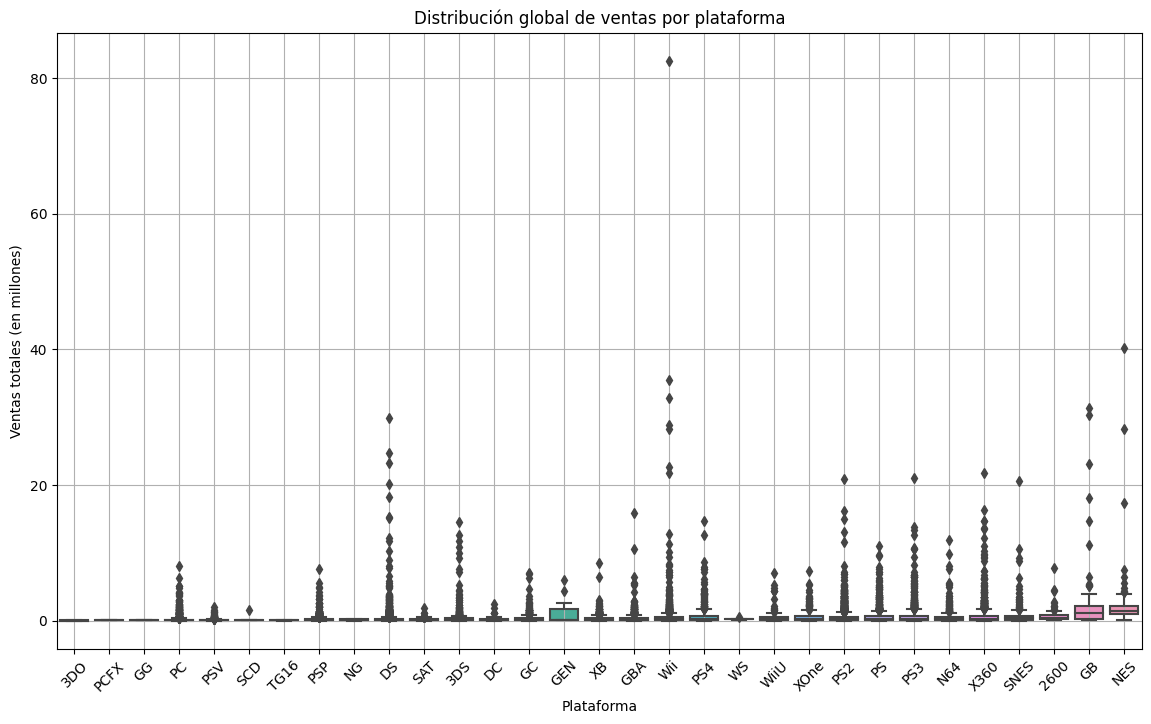

In [10]:
platform_median = games.groupby('platform')['total_sales'].median().sort_values()
plt.figure(figsize=(14, 8))
sns.boxplot(data=games, x='platform', y='total_sales', order=platform_median.index)
plt.title('Distribución global de ventas por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (en millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, aunque para tener una mejor visualización también se podría considerar eliminar algunos outliers para que se pueda apreciar mejor las cajas, pero así también está bien para tener una visión completa de las distribuciones.
</div>

Podemos apreciar que en promedio todas las plataformas tienen una distribución muy similar en cuanto a la venta en millones para cada juego, las plataformas que alcanzaron mayor popularidad tienen más outliers, la pregunta es si la plataforma vuelve a los juegos famosos o aumenta su éxito... mi conclusión es que la plataforma da el potencial de alcanzar a más gente y tener más ventas pero el juego no puede depender de la plataforma para querer vender sino de su propio carácter. Vender en cualquiera de las plataformas del momento traerá más posibilidades de que un juego se vuelva más famoso puesto que puede llegar a más gente, vender solo en plataformas que no tienen exposición hará que las ventas nunca tengan desempeños extraordinarios.

#### El caso de los juegos cross platform

Los juegos cross platform puede que tengan un desempeño similar en ventas a través de las diferentes plataformas en que se vendan aunque convendría ver casos individuales para poder ver que tanta es la igualdad al menos en el caso de los juegos más populares y saber así con certeza que tanto influye la plataforma en el éxito del juego. Más adelante mostraré también el caso del panorama general.


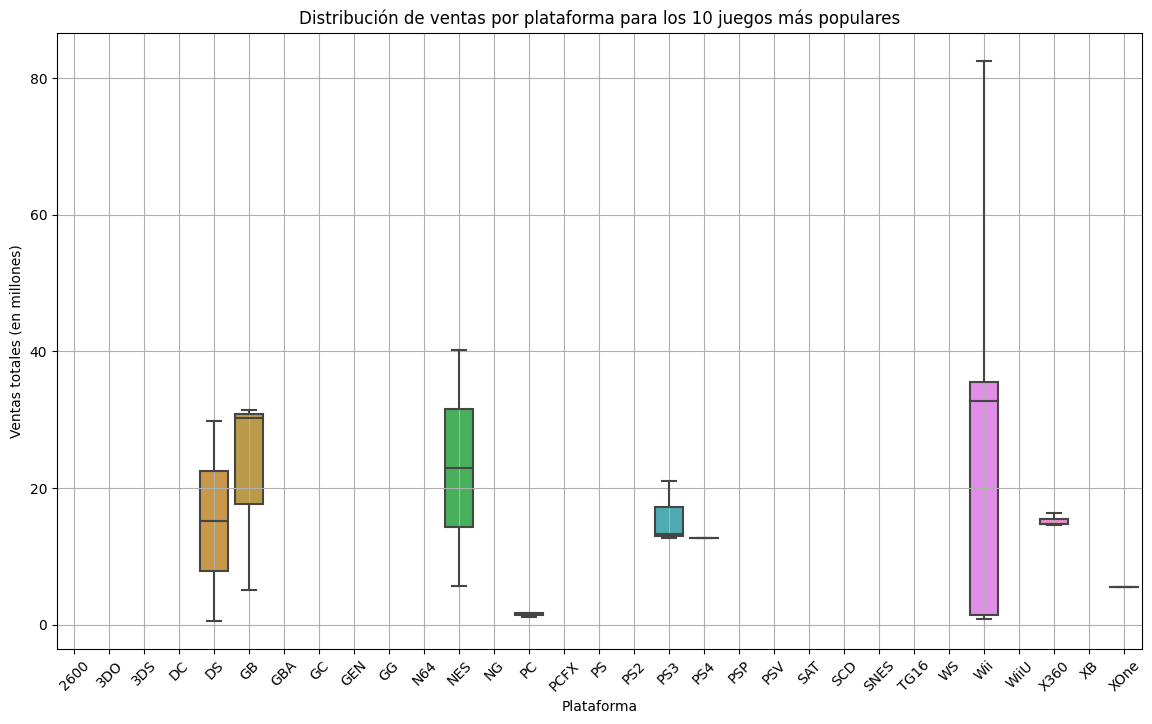

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
3439,Call of Duty: Black Ops,DS,2010-01-01,Shooter,0.50,0.04,0.00,0.04,0.58,74.0,6.0,T
1412,Call of Duty: Black Ops,Wii,2010-01-01,Shooter,0.80,0.45,0.00,0.12,1.37,80.0,5.8,M
1131,Call of Duty: Black Ops,PC,NaT,Shooter,0.58,0.81,0.00,0.23,1.62,81.0,5.2,M
41,Call of Duty: Black Ops,PS3,2010-01-01,Shooter,5.99,4.37,0.48,1.79,12.63,88.0,6.4,M
32,Call of Duty: Black Ops,X360,2010-01-01,Shooter,9.70,3.68,0.11,1.13,14.62,87.0,6.3,M
1040,Call of Duty: Modern Warfare 3,PC,2011-01-01,Shooter,0.41,0.98,0.00,0.32,1.71,78.0,2.5,M
2500,Call of Duty: Modern Warfare 3,Wii,2011-01-01,Shooter,0.55,0.20,0.00,0.08,0.83,70.0,1.8,M
29,Call of Duty: Modern Warfare 3,X360,2011-01-01,Shooter,9.04,4.24,0.13,1.32,14.73,88.0,3.4,M
37,Call of Duty: Modern Warfare 3,PS3,2011-01-01,Shooter,5.54,5.73,0.49,1.57,13.33,88.0,3.2,M
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M


In [11]:
top_10_games = games.groupby('name')['total_sales'].sum().nlargest(10)


top_10_games_data = games[games['name'].isin(top_10_games.index)]


plt.figure(figsize=(14, 8))
sns.boxplot(data=top_10_games_data, x='platform', y='total_sales')
plt.title('Distribución de ventas por plataforma para los 10 juegos más populares')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (en millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


result = (
    top_10_games_data.groupby("name")
    .agg(
        platform_count=("platform", "count"),
        total_sales=("total_sales", "sum"),
        avg_critic_score=("critic_score", "mean")
    )
    .reset_index()
)

top_10_games_data.sort_values(by='name')

In [12]:
result.sort_values(by='total_sales',ascending=False)

,name,platform_count,total_sales,avg_critic_score
8,Wii Sports,1,82.54,76.0
2,Grand Theft Auto V,5,56.58,96.8
6,Super Mario Bros.,2,45.31,NaN
7,Tetris,2,35.84,NaN
3,Mario Kart Wii,1,35.52,82.0
9,Wii Sports Resort,1,32.77,80.0
5,Pokemon Red/Pokemon Blue,1,31.38,NaN
0,Call of Duty: Black Ops,5,30.82,82.0
1,Call of Duty: Modern Warfare 3,4,30.60,81.0
4,New Super Mario Bros.,1,29.80,89.0


Podemos apreciar que para la multiplataforma los juegos más populares se mantienen en un rango de ventas parecido en todas las plataformas aunque viendo los juegos individualmente y las plataformas para las que se vendieron podemos ver que suelen haber juegos que son preferidos en una plataforma y después exportados a otras sin el mismo éxito en ventas, hay una plataforma o un grupo de plataformas para las que venden más. Concluyo que dependiendo del carácter de cada juego se puede llegar a tener más ventas en ciertas plataformas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien.
</div>

#### Scatter plot o gráfico de dispersión de la crítica de usuarios contra ventas totales. 

Es importante demostrar que tanto influyen las críticas el éxito que vaya a tener un juego a la hora de las ventas, antes mencioné que un juego puede tener muy buenas críticas pero ser poco vendido por la poca cantidad de gente que disfruta de cierto género, aquí veremos que tanto influye matemáticamente la crítica a las ventas.

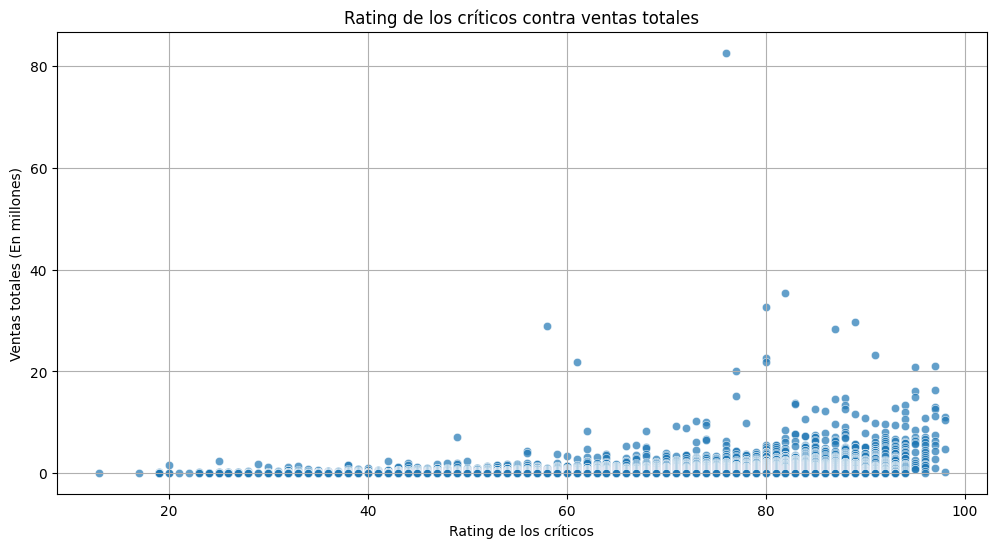

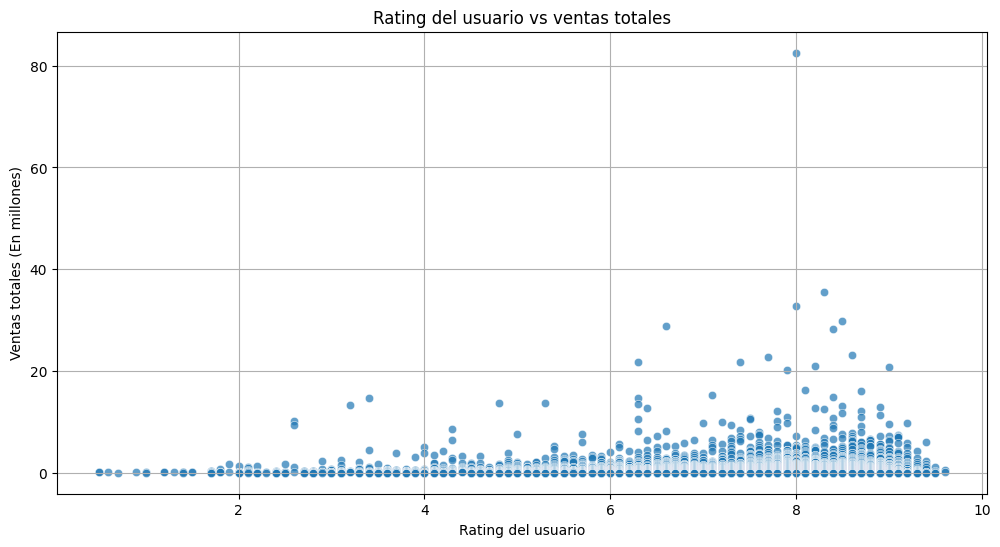

Correlación entre el rating de los críticos y las ventas totales: 0.237
Correlación entre el score del usuario y las ventas totales: 0.089


In [13]:
filtered_df = games.dropna(subset=['critic_score', 'user_score', 'total_sales'])
# Critics score contra ventas totales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='critic_score', y='total_sales', alpha=0.7)
plt.title('Rating de los críticos contra ventas totales')
plt.xlabel('Rating de los críticos')
plt.ylabel('Ventas totales (En millones)')
plt.grid(True)
plt.show()

# user score contra ventas totales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='user_score', y='total_sales', alpha=0.7)
plt.title('Rating del usuario vs ventas totales')
plt.xlabel('Rating del usuario')
plt.ylabel('Ventas totales (En millones)')
plt.grid(True)
plt.show()

# coeficientes de correlación
critic_corr = filtered_df['critic_score'].corr(filtered_df['total_sales'])
user_corr = filtered_df['user_score'].corr(filtered_df['total_sales'])

print('Correlación entre el rating de los críticos y las ventas totales:', round(critic_corr, 3))
print('Correlación entre el score del usuario y las ventas totales:', round(user_corr, 3))

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, estos sctterplot son bastante útiles para visualizar la correlación.
</div>

En base a la correlación que existe entre las críticas y las ventas podemos afirmar que:

Los ratings de la crítica si influyen en cierto modo en las ventas (piensa en cuando has comprado un producto porque una organización asegura que es bueno, usualmente no es el factor determinante pero da más seguridad) mientras que los ratings de los usuarios son mas variados e influyen menos en las ventas totales.(cada quien sus gustos) Esto puede derivar del hecho de que la comunidad de los videojuegos puede ser un tanto peculiar en ocasiones, hay casos de algo llamada rating bombing donde por cualquier motivo a los juegos se les bombardea por parte de los usuarios con reseñas negativas a pesar de que ya muchos lo han comprado lo cual podría hacer ver mal la data, hay gente que compra un juego porque lo vió en un stream y pensaron que sería divertido solo para descubrir que el divertido era el streamer llevando a más ventas pero malas reseñas y poca retención, etc... la vida es complicada y querer resumir todo lo que pasa en una gráfica o con estadística funciona igual que cuando te piden que describas un evento importante en tu vida, puedes dar la idea y pintar una historia en la cabeza de los otros pero todos los detalles quedan escondidos y opacados por esa idea simplificada que construyes.


#### Relación de las ventas del mismo juego en diferentes plataformas

En la sección de juegos cross platform discutí justo esto pero mostrando únicamente los juegos más populares, ahora procedo a mostrar las ventas promedio por plataforma para juegos cross platform en general, esto nos permitirá ver que tanto se diferencia la gráfica con las ventas totales por plataforma y así saber si juegos que se venden en más de una plataforma tienen un patrón de distribución diferente.

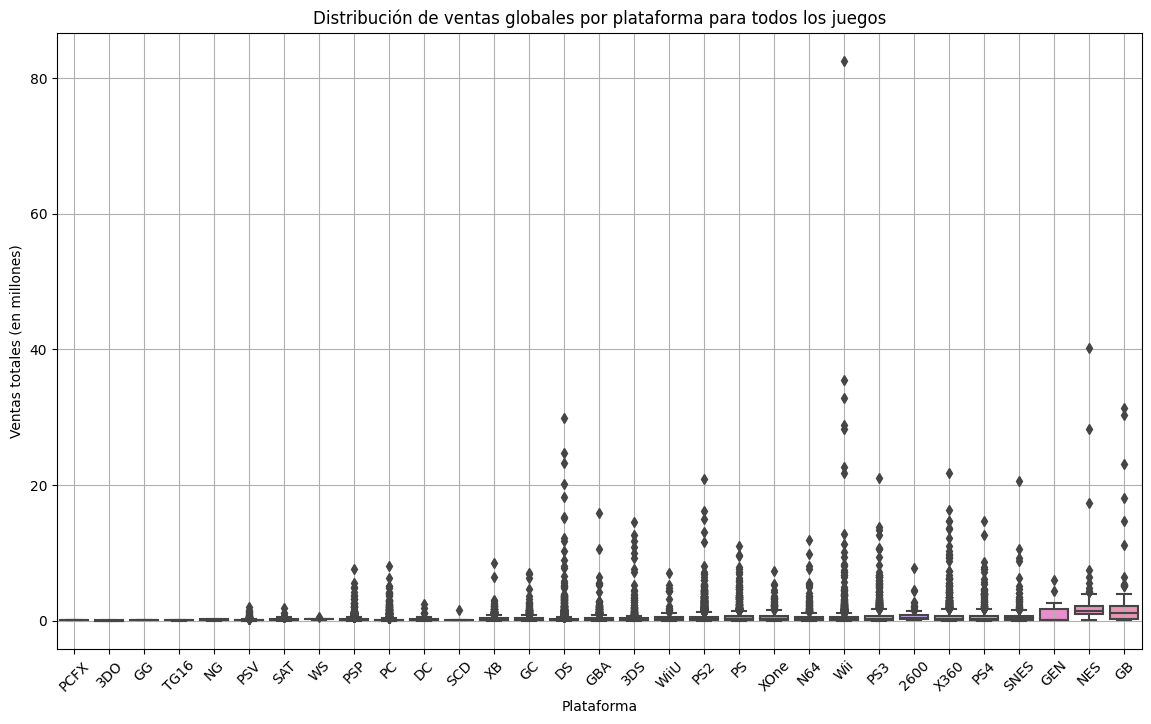

In [14]:

platform_avg_sales = games.groupby('platform')['total_sales'].mean().sort_values()


plt.figure(figsize=(14, 8))
sns.boxplot(data=games, x='platform', y='total_sales', order=platform_avg_sales.index)
plt.title('Distribución de ventas globales por plataforma para todos los juegos')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (en millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()





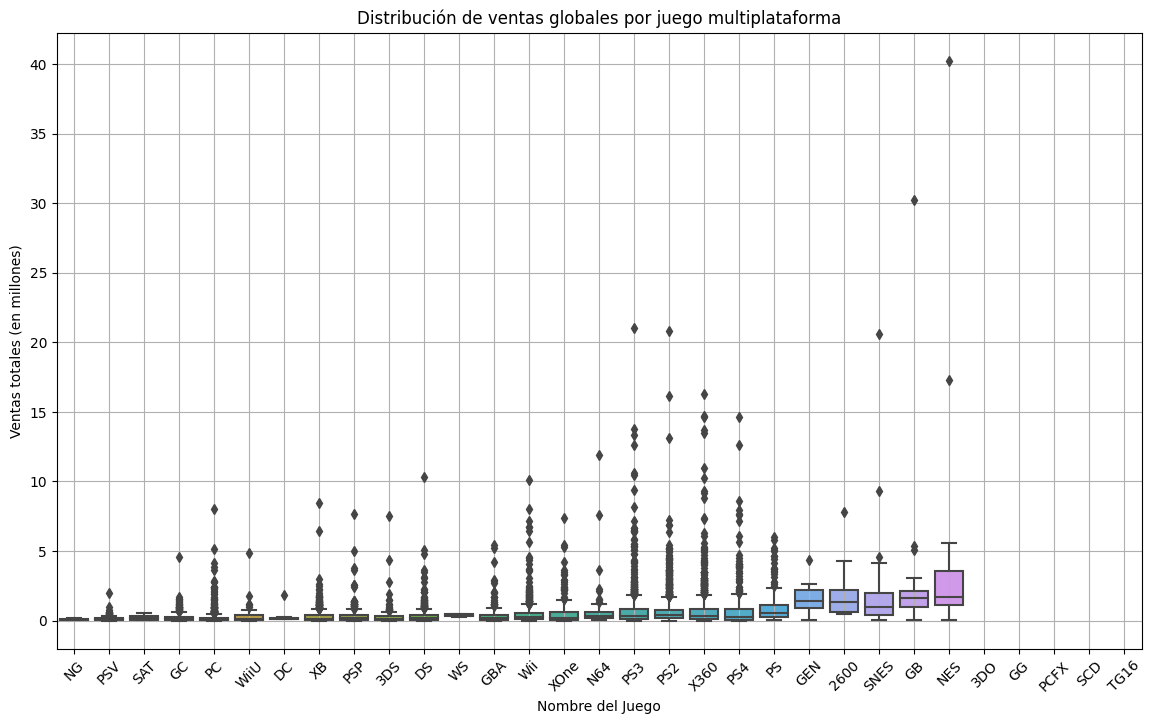

In [15]:
#Filtro para encontrar los juegos multiplatform
games_multiplatform = (
   games.groupby("name")
    .agg(
        platform_count=("platform", "count"),
        total_sales=("total_sales", "sum"),
        avg_critic_score=("critic_score", "mean")
    )
    .reset_index()
)


multiplatform_games = games_multiplatform[games_multiplatform["platform_count"] > 1]
multiplatform_game_names = games_multiplatform[games_multiplatform["platform_count"] > 1]["name"]
games_filtered = games[games["name"].isin(multiplatform_game_names)]


game_avg_sales = games_filtered.groupby("platform")["total_sales"].mean().sort_values()

# Gráfico con la info del filtro anterior.
plt.figure(figsize=(14, 8))
sns.boxplot(data=games_filtered, x="platform", y="total_sales", order=game_avg_sales.index)
plt.title('Distribución de ventas globales por juego multiplataforma')
plt.xlabel('Nombre del Juego')
plt.ylabel('Ventas totales (en millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Vemos que los juegos mantienen practicamente la misma distribución con la excepción de que las plataformas menos usadas no tienen juegos cross platform por lo que no muestra datos de estas, todas las demás plataformas mantienen la misma o casi la misma distribución con lo cual se puede inferir que efectivamente la plataforma no determina el éxito del juego aunque si da potencial para alcanzar mayor número de clientes y hay juegos que alcanzan más fama en una plataforma específica aunque esto no se puede ver directamente en la gráfica.


#### Distribución general de juegos por género

A continuación veremos que tanto afecta el éxito de los juegos su género, veremos que tipo de género atrae más ventas y si tienen alguna diferencia significativa en la media de unidades vendidas por juego.

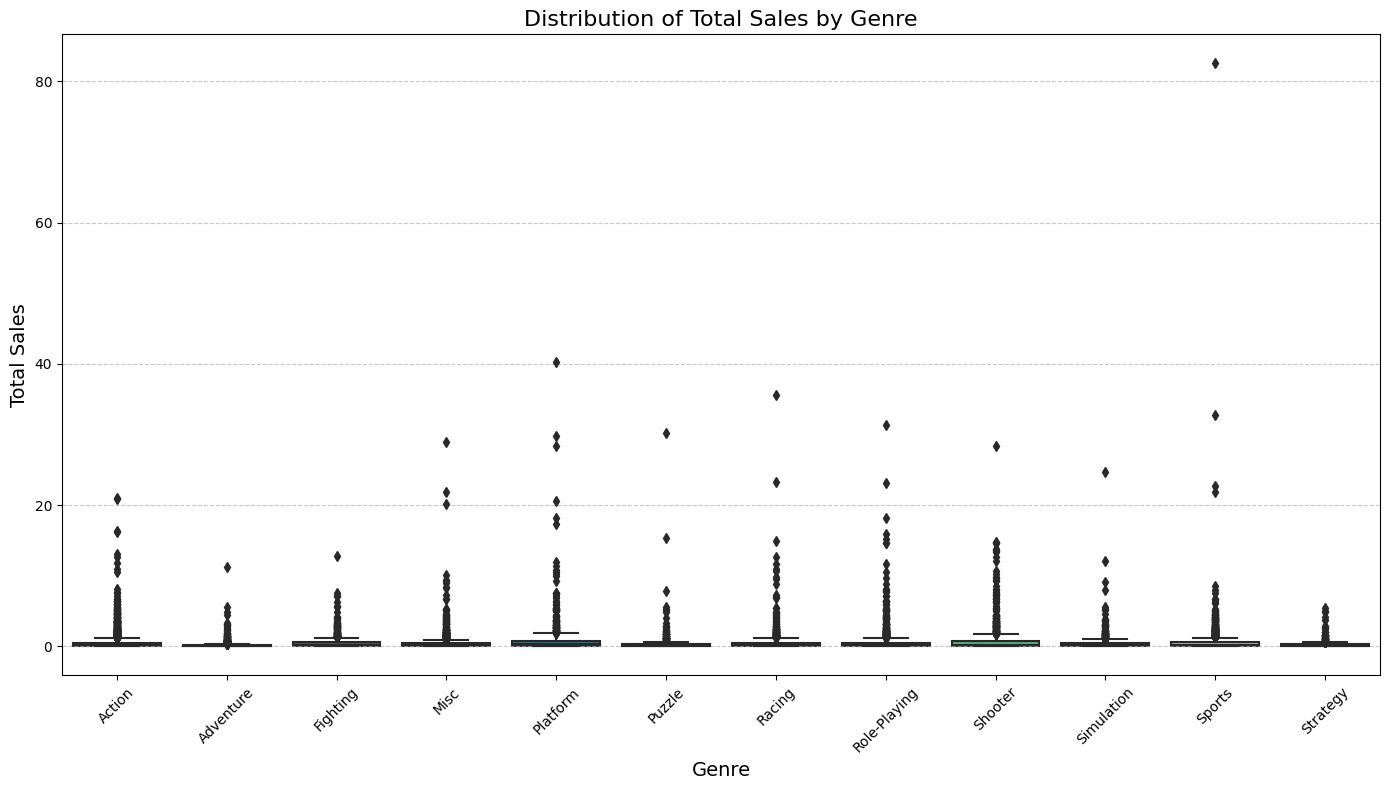

In [16]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=games,
    x="genre",
    y="total_sales",
    palette="viridis"
)


plt.title("Distribution of Total Sales by Genre", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)


plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [17]:

#Pequeña tabla que muestra el total de juegos para cada género.
genre_counts = games["genre"].value_counts().reset_index()
genre_counts.columns = ["genre", "count"]
genre_counts = genre_counts.sort_values(by="count", ascending=False).reset_index(drop=True)


genre_median = games.groupby('genre')['total_sales'].median().sort_values()

genre_counts

,genre,count
0,Action,3369
1,Sports,2348
2,Misc,1750
3,Role-Playing,1498
4,Shooter,1323
5,Adventure,1303
6,Racing,1249
7,Platform,888
8,Simulation,873
9,Fighting,849


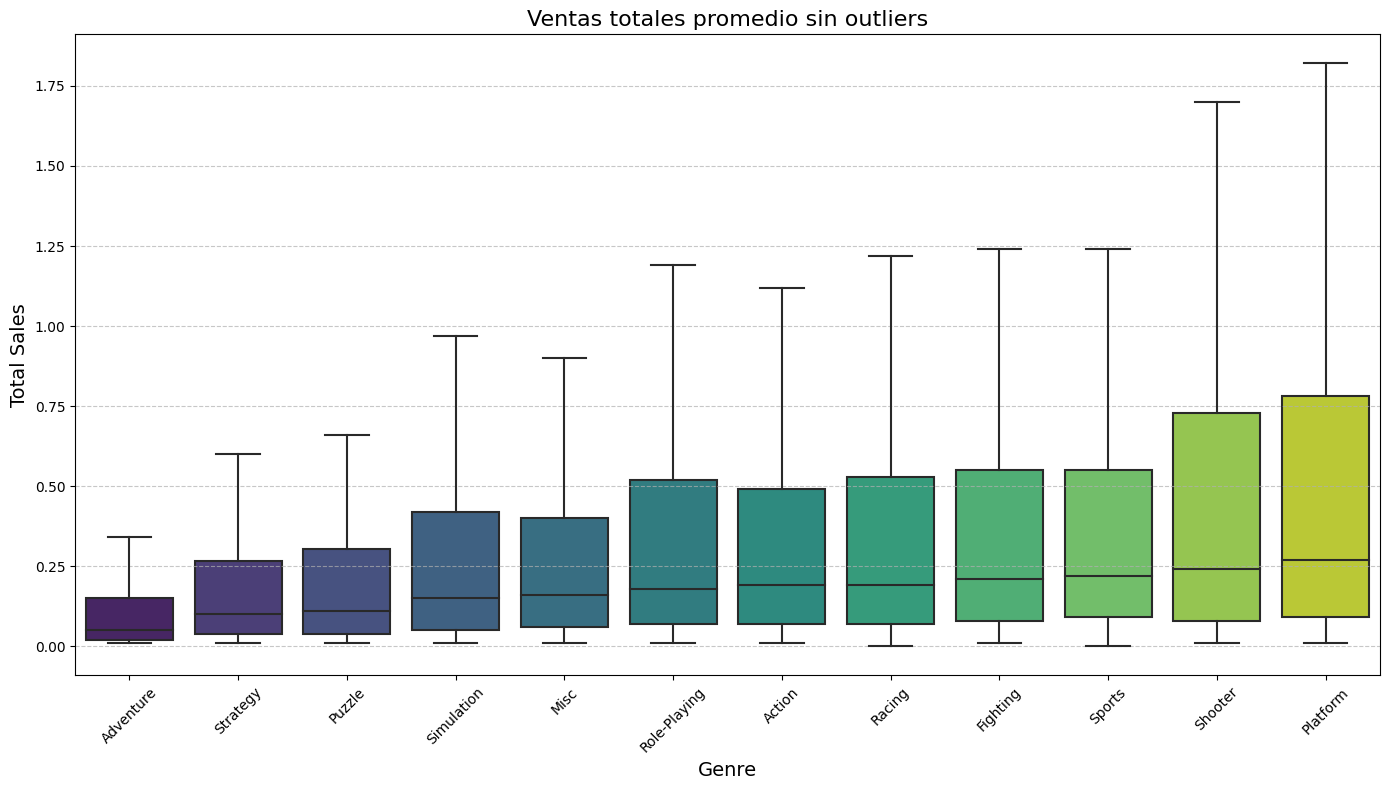

In [18]:


# Creamos una nueva gráfica sin outliers para poder apreciar mejor las diferencias.

plt.figure(figsize=(14, 8))
sns.boxplot(
    data=games,
    x="genre",
    y="total_sales",
    palette="viridis",
    showfliers=False,
    order=genre_median.index
)


plt.title("Ventas totales promedio sin outliers", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)


plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente! Sin los outliers las distribuciones se pueden comparar mejor entre las distintas cajas.
</div>

Podemos ver que la diferencia en ventas promedio de todos los juegos no es tan grande como se podría esperar, sin embargo hay varios géneros que sobresalen como platform, shooter y sports  mientras que géneros como adventure, strategy y puzzle no tienen tanta tracción. De hecho si vemos los principales juegos por ventas se puede notar que pertenecen a las principales categorías con la excepción de Tetris y pokemon. Es decir si un juego pertence a los juegos con mayores ventas promedio y está en una plataforma popular su posibilidad de despegar en popularidad aumenta, aunque no es garantía.

### Perfil de usuario por región para determinar diferencias culturales que influencien el éxito del juego.

Procedo a dividir la información en 3 diferentes perfiles para poder determinar como cambian las tendencias entre las 3 regiones de Norte América, Europa y Japón. 

#### Principales plataformas para cada región

Creando una gráfica de barras podemos apreciar la cuota de mercado que cada consola se lleva para cada región, esto nos puede demostrar ciertas predispocisiones en los éxitos de un juego para cada mercado, si por ejemplo un juego exclusivo para xbox se vende en una región donde xbox no es una consola principal entonces tendrá menor desempeño en ventas, lo opuesto también aplica, pues si un juego exclusivo para play station se vende en una región con gran predisposición por playstation este podrá tener mayor oportunidad de subir las ventas.

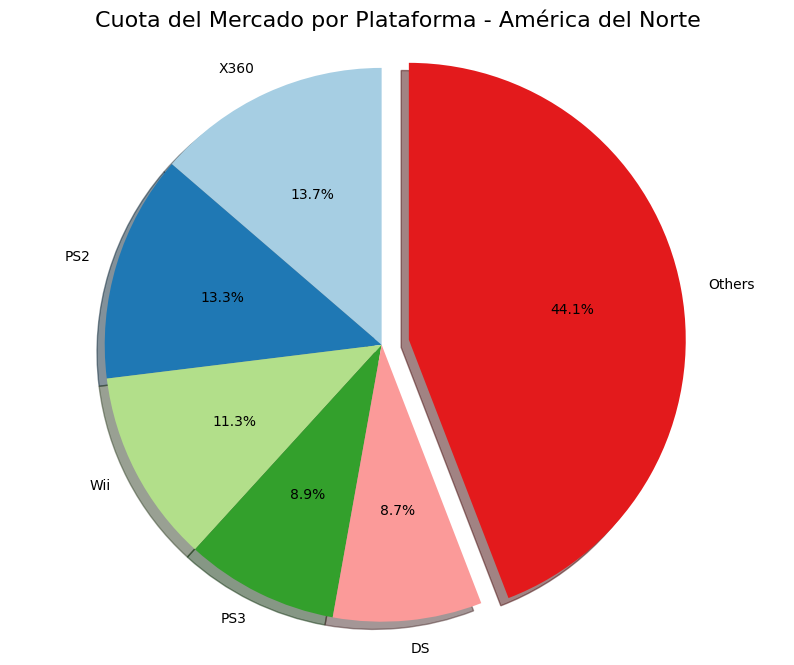

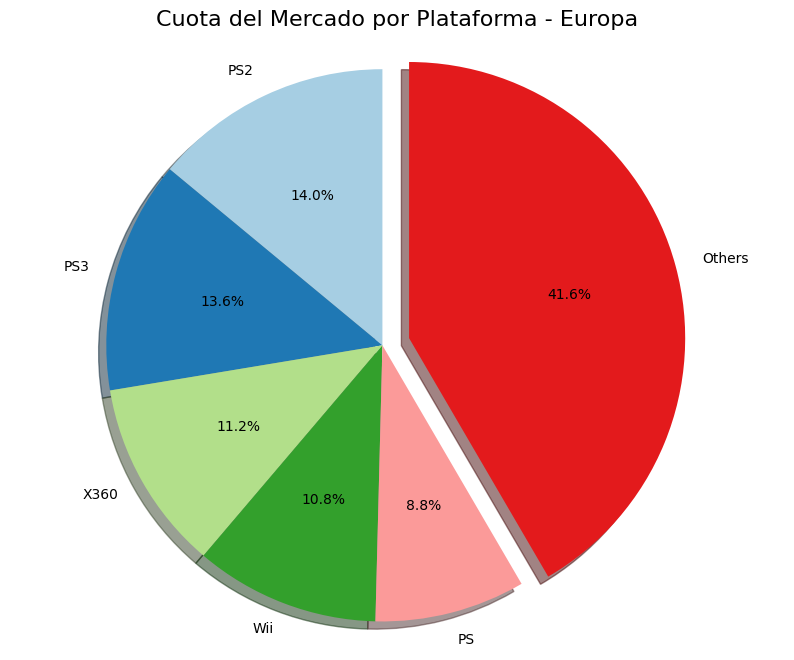

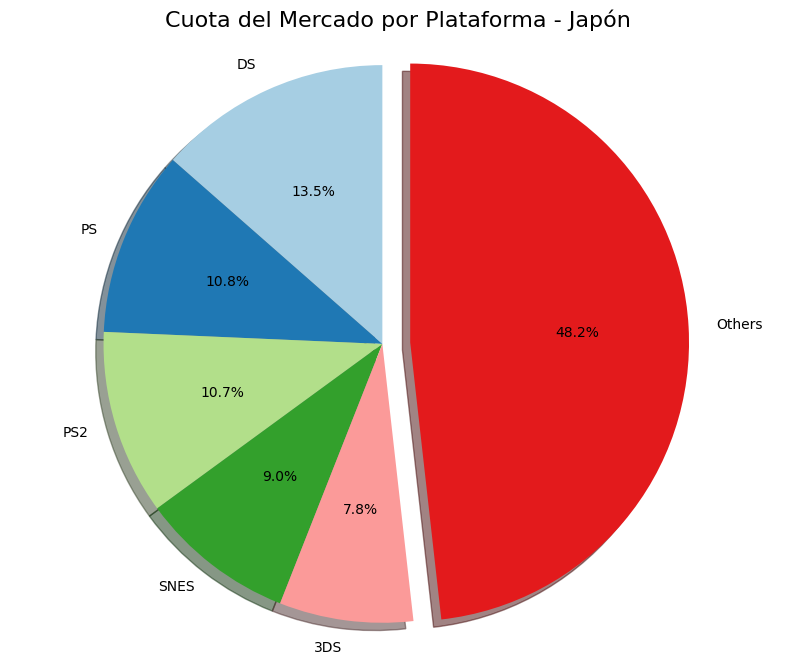

In [19]:
platform_sales_by_region = games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

#Aquí obtenemos la cuota de mercado para cada región dividiendo cada monto individual de las plataformas por el 
#monto total de ventas de todas las plataformas y haciendo eso por cada región.
na_market_share = (platform_sales_by_region['na_sales'] / platform_sales_by_region['na_sales'].sum()) * 100
eu_market_share = (platform_sales_by_region['eu_sales'] / platform_sales_by_region['eu_sales'].sum()) * 100
jp_market_share = (platform_sales_by_region['jp_sales'] / platform_sales_by_region['jp_sales'].sum()) * 100


#La siguiente función facilita definir el market share por cada región en el pie chart usando las tablas anteriores
#como referencia para graficar.
def plot_top_platform_market_share_pie_chart(market_share, region_name):
    plt.figure(figsize=(10, 8)) 
    
    
    top_platforms = market_share.sort_values(ascending=False).head(5)
    
 
    others_share = market_share[~market_share.index.isin(top_platforms.index)].sum()
    
  
    final_market_share = top_platforms.append(pd.Series({'Others': others_share}))
    
    # pie chart
    plt.pie(
        final_market_share,                    
        labels=final_market_share.index,       
        autopct="%1.1f%%",               
        startangle=90,  
        shadow=True, 
        explode=[0.1 if label == 'Others' else 0 for label in final_market_share.index], 
        colors=plt.cm.Paired.colors 
    )
    
    
    plt.title(f"Cuota del Mercado por Plataforma - {region_name}", fontsize=16)
    plt.axis('equal') 
    plt.show()


# Plot oara North America
plot_top_platform_market_share_pie_chart(na_market_share, "América del Norte")

# Plot para Europe
plot_top_platform_market_share_pie_chart(eu_market_share, "Europa")

# Plot para Japan
plot_top_platform_market_share_pie_chart(jp_market_share, "Japón")



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Aunque no soy un fan de las gráficas circulares (porque no siempre se visualiza bien la diferencia de los grupos) aquí hiciste bien en colocar los porcentajes para que sea más fácil de comparar la diferencia entre ellos.
</div>

#### Diferencias en la variación de cuota de mercado.

Depende de las preferencias del país, intento explicar que posibles características podrían haber generado semejantes diferencias.

América: Los americanos tienden a preferir comprar cosas nacionales por lo que es entendible que Xbox de microsoft tenga mayor dominio de ventas, lo chistoso es que esa sea la única plataforma americana que permanece en el top puesto que las siguientes 4 son todas japonesas, si bien los americanos prefieren productos nacionales no dejan pasar la oportunidad de obtener productos de gran calidad sin importar que procedan de otros países.

Europa: Las plataformas japonesas más recientes tienen preferencia por sobre las plataformas Americanas, curiosamente su distribución se ve muy similar a la americana pero con la diferencia de que las consolas en el top tienen diferentes lugares.

Japón: Desde las décadas de los 80 japón ha tenido mayor aversión por el cambio haciendo que la gente suela preferir viejas tecnologías por tanto tiempo como duren. eso podría explicar porque en el mercado japones consolas que son un poco menos nuevas tienen mayores ventas puesto que se mantienen vigentes en su zona por más tiempo. En otras palabras les toma un poco más tiempo adoptar nuevas plataformas por lo que la gráfica difiere de los mercados americano y europeo.

#### Principales 5 géneros para cada región

Usando un enfoque similar a la sección anterior procedo a crear las gráficas de barras que describen la distribución de ventas por género para cada región. Con la misma intención de la sección anterior de demostrar lo mucho que influye vender cierto tipo de juego en ciertas regiones y entender que juegos suelen volverse más populares según la región.

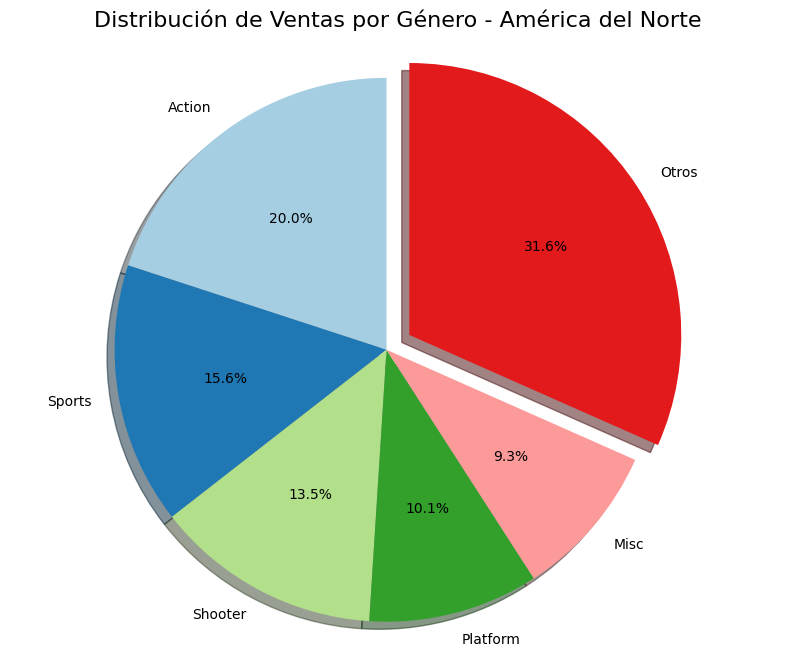

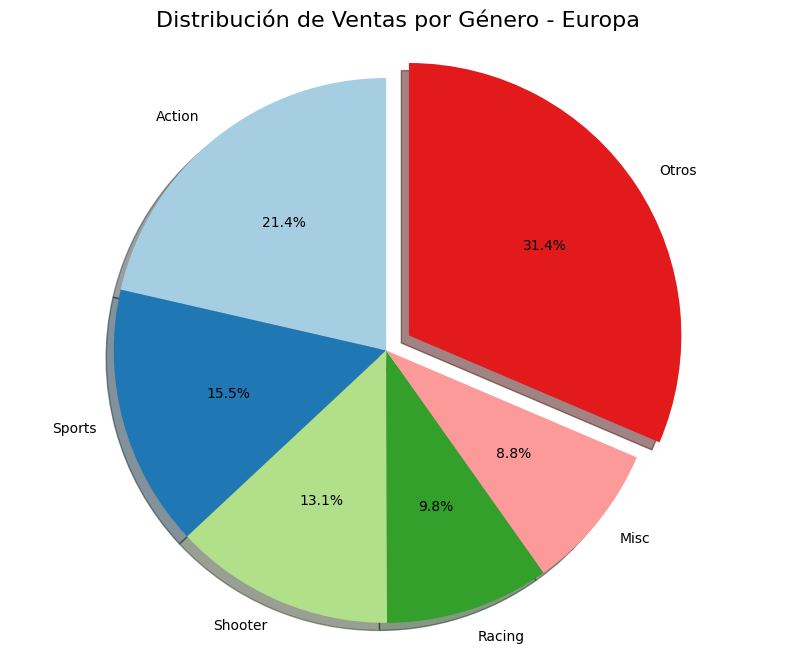

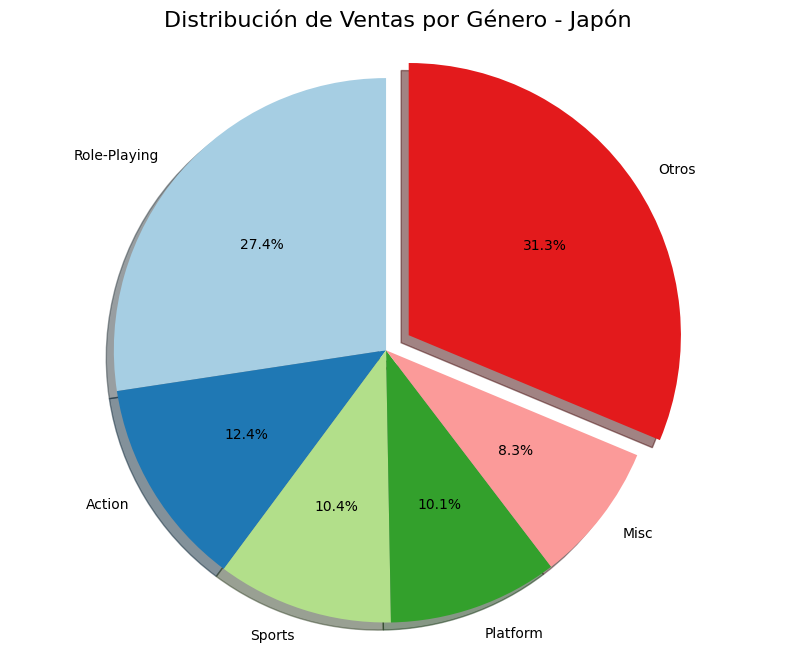

In [20]:
def plot_genre_market_share_pie_chart(sales_by_genre, region_name):
    plt.figure(figsize=(10, 8))
    
    # Ordenamos los géneros por ventas de mayor a menor
    top_genres = sales_by_genre.sort_values(ascending=False).head(5)
    
    # Sumamos las ventas de los géneros que no están en el top 5 como 'Otros'
    others_sales = sales_by_genre[~sales_by_genre.index.isin(top_genres.index)].sum()
    
    # Combinamos los géneros top 5 con la categoría 'Otros'
    final_genre_sales = top_genres.append(pd.Series({'Otros': others_sales}))
    
    #  pie chart
    plt.pie(
        final_genre_sales,                    
        labels=final_genre_sales.index,       
        autopct="%1.1f%%",               
        startangle=90,  
        shadow=True,  # Añade sombra para mejor visualización de profundidad
        explode=[0.1 if label == 'Otros' else 0 for label in final_genre_sales.index],  # Destacar 'Otros'
        colors=plt.cm.Paired.colors  # Paleta de colores distinta
    )
    
    # Título y mostrar el gráfico
    plt.title(f"Distribución de Ventas por Género - {region_name}", fontsize=16)
    plt.axis('equal')  # Asegura que el gráfico sea un círculo
    plt.show()


# Ventas por género para América del Norte
na_sales_by_genre = games.groupby('genre')['na_sales'].sum()

# Gráfico para América del Norte
plot_genre_market_share_pie_chart(na_sales_by_genre, "América del Norte")

# Ventas por género para Europa
eu_sales_by_genre = games.groupby('genre')['eu_sales'].sum()

# Gráfico para Europa
plot_genre_market_share_pie_chart(eu_sales_by_genre, "Europa")

# Ventas por género para Japón
jp_sales_by_genre = games.groupby('genre')['jp_sales'].sum()

# Gráfico para Japón
plot_genre_market_share_pie_chart(jp_sales_by_genre, "Japón")



#### Explicación de la diferencia en preferencias.
Es bien sabido que cada país tiene sus diferencias en gustos y formas de pensar, me parece que la diferencia en juegos más vendidos es una representación de esa diferencia en cultura, vemos que en japón donde juegos como street fighter o mortal combat nacieron se tiene un mayor aprecio por el género de pelea, Estados Unidos donde los tiroteos escolares son noticia cada 3 o 4 días tiene una mayor inclinación por shooters aunque no podemos decir que los shooters son la causante de semejante problema puesto que Europa con mayor atracción por ese tipo de juegos no sufre de semejante situación, las preferencias y cultura de cada país determinan el tipo de juego que se hará popular 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Buen trabajo!
</div>

#### Influencia de los ratings ESRB para las ventas promedio de los juegos.


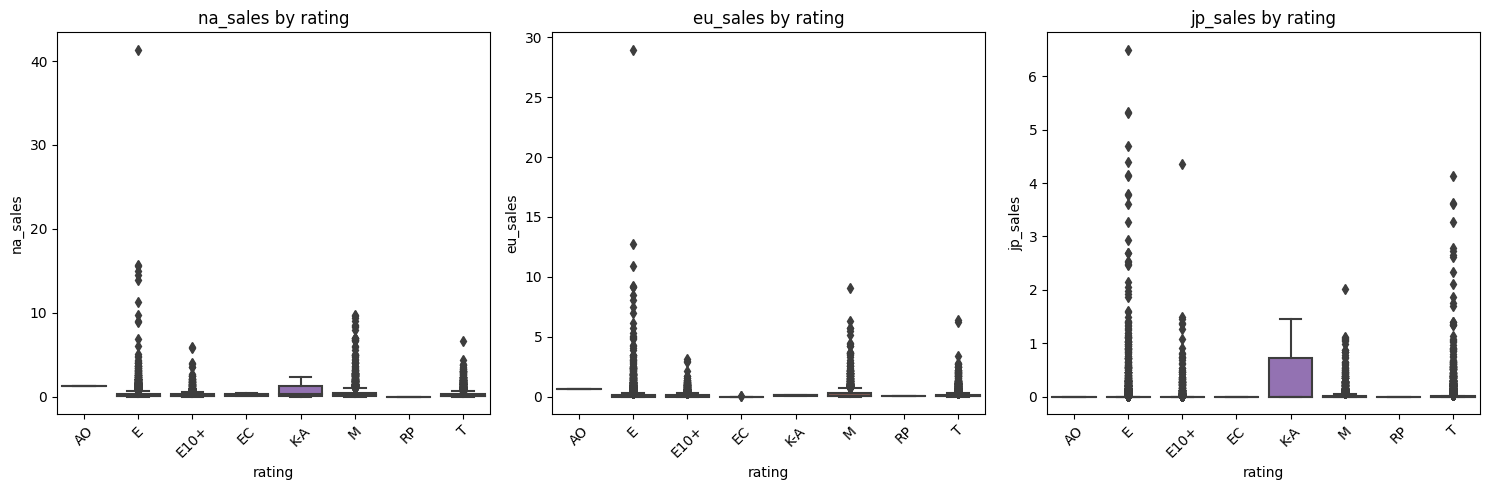

Ventas promedio por rating según cada región:
        na_sales  eu_sales  jp_sales
rating                              
AO      1.260000  0.610000  0.000000
E       0.324058  0.178008  0.049652
E10+    0.248817  0.132761  0.028310
EC      0.191250  0.013750  0.000000
K-A     0.853333  0.090000  0.486667
M       0.478874  0.309642  0.041100
RP      0.000000  0.026667  0.000000
T       0.256586  0.144218  0.051131


In [21]:

filtered_games = games.dropna(subset=[ "na_sales", "eu_sales", "jp_sales"])


correlations = []
regions = ['na_sales', 'eu_sales', 'jp_sales']

plt.figure(figsize=(15, 5))
#Esta línea itera la lista de regiones por medio de enumerate que crea un índice para poder hacer la iteración más sencilla
for i, region in enumerate(regions, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='rating', y=region, data=filtered_games)
    plt.xticks(rotation=45)
    plt.title(f'{region} by rating')

plt.tight_layout()
plt.show()

# Aquí calculamos las ventas promedio por región y lo mostramos en tabla
avg_sales = filtered_games.groupby('rating')[regions].mean()
print("\
Ventas promedio por rating según cada región:")
print(avg_sales)

Si nos fijamos en la distribución de promedios de ventas podemos ver que si bien hay outliers que parecen pintar una diferencia enorme la mayoría de juegos tienen ventas muy similares sin importar el rating y curiosamente los juegos para adultos tienen mayores ventas promedio aunque ningún outlier. De todos modos me gustaría ver la correlación matemática para poder descartar completamente que el rating influya en las ventas del juego.

In [22]:
# Encontré esta solución en internet donde mapeamos los valores de rating a un número para hacer la correlación
# La correlación necesita valores graduales por lo que interpretar los ratings de modo gradual la vuelve posible.
rating_mapping = {
    "E": 1,     # Everyone
    "E10+": 2,   # Everyone 10+ 
    "T": 3,     # Teen
    "M": 4,     # Mature
    "AO": 5      # Adults Only
    # Ignoraremos los juegos RP puesto que no tienen rating y no hacen sentido en la correlación
}

# Usamos la función map para indicar a pandas que tiene que reemplazar los valores originales por lo que está en los 
#diccionarios
games["rating_numeric"] = games["rating"].map(rating_mapping)
filtered_games = games.dropna(subset=["rating_numeric", "na_sales", "eu_sales", "jp_sales"])

# nos deshacemos de filas donde el mapeo no haya sido exitoso para evitar errores 
filtered_games = filtered_games[filtered_games['rating_numeric'].notna()]

# Calculamos las correlaciones
correlation_results = {}
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    correlation = filtered_games['rating_numeric'].corr(filtered_games[region])
    correlation_results[region] = correlation


print("Coeficientes de correlación para las diferentes regiones:")
print(correlation_results)



Coeficientes de correlación para las diferentes regiones:
{'na_sales': 0.03248778278916046, 'eu_sales': 0.04624887433699556, 'jp_sales': -0.005234823989252525}


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso del ciclo for para ir calculando las correlaciones y el efecto del rating para cada una de las regiones.
</div>

Vemos que la correlación es mínima para todas las regiones, es decir que el rating influye de forma mínima en las ventas de videojuegos, aunque se puede apreciar que juegos de categoría E suelen ser sacar más super éxitos en todos los mercados (tienen más outliers aunque ventas promedio semejantes a los demás ratings)

Esto quiere decir que hacer un juego T o M va a influir poco en las ventas aunque si reduce teóricamente la cantidad de público objetivo, y hay más oportunidad de que sea un mega hit (vender millones y millones) si no es AO (esto en base a los outliers), todos sabemos que a los niños no les importa que un juego sea T M o A0, si el juego les gusta van a jugarlo a menos que tengan padres sobreprotectores y los adultos pueden jugar cualquier categoría por lo que hace sentido que el rating no influya nada en las ventas generales o promedio (a pesar de que si puede influir en las decisiones individuales específicamente para con niños que no tienen permitido jugar juegos fuera de su categoría y que tienen que dormir a las 7:00)

### Prueba de Hipótesis 

A continuación presento dos hipótesis

Hipótesis 1era : Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

H0 Nula: No hay diferencia en los ratings promedio para los usuarios de Xbox y PC 
H1 Alternativa: Hay diferencia en los ratings promedio entre usuarios de Xbox y PC

Hipótesis 2nda :  Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

H0 Nula: No hay diferencia entre ambos géneros.
H1 Alternativa: Los ratings difieren entre ambos géneros.

Para probar las hipótesis realizaremos un T Test el cual mide la probabilidad de que dadas n cantidad de variaciones de dos distribuciones normales este compara que tan probable es que una de ellas obtenga un valor que se diferencie bastante del promedio y no por casualidad, así estaremos seguros de que la diferencia no fue una situación de azar sino que repetidamente se mantiene.

El umbral alpha será de .10 puesto que no hay riesgo de que mueran millones si nos equivocamos.

Las hipótesis nula y alternativa las formulé en base a la convención de que la nula representa una ausencia de cambio y la alternativa representa la negación de la nula.



In [35]:

# Aquí filtramos para elegir solo los ratings de xbox one y pc 
xbox_one_ratings = games[(games['platform'] == 'XOne') & (games['user_score'].notna())]['user_score']
pc_ratings = games[(games['platform'] == 'PC') & (games['user_score'].notna())]['user_score']

# Realizamos un test T para las dos distribuciones
t_stat1, p_value1 = ttest_ind(xbox_one_ratings, pc_ratings, equal_var=True)

# Los resultados usando los valores almacenados en t_stat1 y p_value 1
print("Hipótesis 1: Xbox One v.s PC")
print(f"T-statistic: {t_stat1:.3f}, P-value: {p_value1:.3f}")

if p_value1 < 0.1:
    print("Resultado:Se Rechaza la hipótesis nula (hay una diferencia significativa en los ratings).")
else:
    print("Resultado: No se rechaza la hipótesis nula (no hay diferencia significativa en los ratings).")
print("\n")

# Aquí filtramos para elegir solo los ratings de acción y deportes
action_ratings = games[(games['genre'] == 'Action') & (games['user_score'].notna())]['user_score']
sports_ratings = games[(games['genre'] == 'Sports') & (games['user_score'].notna())]['user_score']

#Realizamos un test T para las dos distribuciones
t_stat2, p_value2 = ttest_ind(action_ratings, sports_ratings, equal_var=True)


print("Hipótesis 2: Acción vs Deportes")
print(f"T-statistic: {t_stat2:.3f}, P-value: {p_value2:.3f}")


if p_value2 < 0.10:
    print("Resultado:Se Rechaza la hipótesis nula (hay una diferencia significativa en los ratings).")
else:
    print("Resultado: No se rechaza la hipótesis nula (no hay diferencia significativa en los ratings).")
    
    

Hipótesis 1: Xbox One v.s PC
T-statistic: -4.368, P-value: 0.000
Resultado:Se Rechaza la hipótesis nula (hay una diferencia significativa en los ratings).


Hipótesis 2: Acción vs Deportes
T-statistic: 1.626, P-value: 0.104
Resultado: No se rechaza la hipótesis nula (no hay diferencia significativa en los ratings).


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, se interpretaron correctamente los p valores obtenidos en cada una de las pruebas.
</div>

#### Observaciones de los resultados de Hipótesis

En el caso de ratings de XBOX contra PC podemos apreciar que la posibilidad de observar esos resultados manteniendo el caso de la h0 (no hay variaciones) es simplemente demasiado improbable por lo cual inferimos que la h1 es cierta y las dos distribuciones son diferentes, en otras palabras los usuarios de Xbox One y PC tienen ratings diferentes para los juegos en general.

En el caso de los géneros parece ser que a pesar del alto umbral alpha de aceptación la h0 no se rechaza por lo que se aprecia muy poca variación real entre los ratings de los juegos de deportes y acción y la probabilidad de que sus diferencias se deban a variación estadística es alta. Esto quiere decir que teniendo la hipótesis nula hay 10% de probabilidad de que se observe al menos algo tan extremo como los resultados obtenidos, si bien parece mucho, en estadística semejante variación todavía podría ser posible. En conclusión los géneros de Acción y Deportes suelen obtener los mismos ratings en promedio 

### Conclusiones Generales 

A lo largo de todo este documento pudimos apreciar los diferentes aspectos que pueden influir en el éxito de un juego, vimos que si bien ciertas plataformas suelen acumular gran cantidad de ventas totales para juegos esto se debe principalmente a la gran cantidad de juegos lanzados para esas plataformas y que el promedio de ventas real para un juego promedio en cada plataforma era bastante similar por lo que se puede concluir que la plataforma no determina el éxito del juego en todos los casos pero si le da el potencial de alcanzar mayores ventas y por lo tanto mayor éxito, entonces la plataforma no determina el éxito del juego, pero ofrece una oportunidad para lograrlo. 

Este punto se confirma más al mostrar como los juegos multiplataforma alcanzan promedios similares en todas las plataformas en las que se venden aunque mayor éxito en una específica en la mayoría de los casos que las demás por lo que se puede afirmar que cualquier videojuego puede triunfar en cualquier plataforma aunque suele tener mejor recepción en la plataforma para la que fue diseñado.

Luego vimos el caso de la influencia del rating en el juego y pudimos apreciar lo poco que este suele influir, en especial en el caso del rating de usuario en las ventas del juego; si bien los ratings de críticos sí mostraban una pequeña correlación con las ventas esta no era lo suficientemente alta para poder decir que un buen rating de la crítica traerá grandes ventas a cualquier juego, aunque si es observable que a mayor rating mayoir probabilidad de ventas, esto no es una ley sino meramente una observación, no por tener un buen rating tendrá buenas ventas aunque un buen rating nos ofrece la posibilidad de mejores ventas, por eso la baja correlación. También es importante notar que no hay casos de juegos con mal rating y muchos millones de ventas por lo que podemos demostrar que un mal rating puede influir con mayor peso en reducir las ventas de lo que un buen rating influye en aumentarlas.

Siguiendo con el análisis dividimos las ventas totales de juegos por género y es ahí donde pudimos apreciar las diferencias más importantes en el promedio de ventas lo cual demuestra que hay géneros favoritos con más chances de generar ingresos para la empresa y géneros que son más de nicho los cuales venderán pero no al nivel de los mejores juegos con mayor aceptación o alcance, esto sin embargo no es algo que siga un patrón único a lo largo de todo el mercado puesto que según la región el género favorito fue diferente, esto nos lleva a las regiones; al evaluar los juegos por regiones pudimos apreciar una diferencia importante en tres puntos principales:

**Preferencia de plataforma**: Donde cada región tiene sus plataformas favoritas para las cuales compran más juegos lo cual puede afectar la popularidad o éxito de un juego según su plataforma de origen y la región en la cual se venda

**Distintos géneros más populares**: Esto significa que los géneros preferidos de cada región varian haciendo que juegos puedan ganar o perder éxito según el género y la región.

**Afectación del rating ESRB**: En cada región este es el factor que menos influyó pero que de todos modos mostró ciertos patrones como el hecho de que juegos de AO tienen ventas más elevadas en promedio aunque no alcanzan éxitos totales de ventas o que las categorías de E son las que más chances tienen de vender en gran medida.

Por último podemos apreciar que  no suelen haber diferencias significativas entre los géneros y los ratings de usuario aunque si las puede llegar a haber entre plataformas,

En conclusión los principales factores que determinan o mejor dicho influyen en el éxito de un juego son en orden de importancia:

género

críticas 

plataforma 

rating ESRB

Aunque no son los determinantes puesto que un juego puede tener bien todos esos puntos y aún así no ser un éxito o nisiquiera alcanzar ventas suficientes para cubrir sus costos, el principal factor y lamentablemente que no se puede incluir en estadística para el éxito de un juego esta escondido en algún lugar de la psicología, la neurología y poder descifrar los gustos del público, me gustaría concluir con una pequeña historia que se dio lugar en Netflix cuando era una startup. Los directivos querían encontrar la forma de predecir que películas valía la pena adquirir en grandes cantidades para poder tener siempre disponibles para renta (Netflix empezó como renta de películas a domicilio) por lo cual en lugar de crear un algoritmo que era muy caro y complicado o utilizar una estadística que era muy poco fidedigno para predecir gustos humanos, decidieron contratar a un cinéfilo experto que entendía los gustos de cine del mercado americano y él les decía a que películas asignar prioridad, esto resulto en casi siempre poder predecir la película que más se rentaría, la moraleja de la historia es que lo que predice el éxito de un producto es el poder entender que tanto resuena con el público en general o que tanto vaya a aceptarlo la gente (entender sus gustos), por lo que a no ser que se cree un algoritmo que pueda predecir eso en base a big data como suele hacer tiktok o las redes sociales para recomendarnos videos, encontrar una estadística que defina el éxito de algo tan basado en gustos como un videojuego es simplemente una fantasía de los analistas de datos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Buenas conclusiones!
    
Mencionas aspectos observado en todo el proyecto y además se incluyen recomendaciones.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola!
    
Te quiero felicitar por tu proyecto, está bastante completo y bien realizado, me gustó especialmente la parte en la que realizas las gráficas de pay y las pruebas de hipótesis, todo está muy bien ordenado y escrito. Puedo aprobar tu proyecto, éxito en los siguientes sprints.
    
Saludos, Marcos.
    

</div>